In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
## Read files from my C: Drive
data = (r"C:\Users\user\Desktop\Kaggle\airlinecustomer.csv")
df = pd.read_csv(data)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
## Drop unwanted columns
df.drop(columns = ["Unnamed: 0", "id"], axis = 1, inplace = True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
## Do some data cleaning if need 
print("Checklist of dataset")
print("_" * 20)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("_" * 20)
print("Duplicated Values:", df.duplicated().any())
print("_" * 20)
print("Missing Values:", df.isnull().values.sum())

Checklist of dataset
____________________
Number of rows: 103904
Number of columns: 23
____________________
Duplicated Values: False
____________________
Missing Values: 310


In [5]:
## Check the missing values come from which columns
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [6]:
## All missing values come from only one columns, in this case, I will make it simple and fill with mean values of the column
df["Arrival Delay in Minutes"] = df.fillna(df["Arrival Delay in Minutes"].mean())

In [7]:
## Check if I already filled all missing values
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

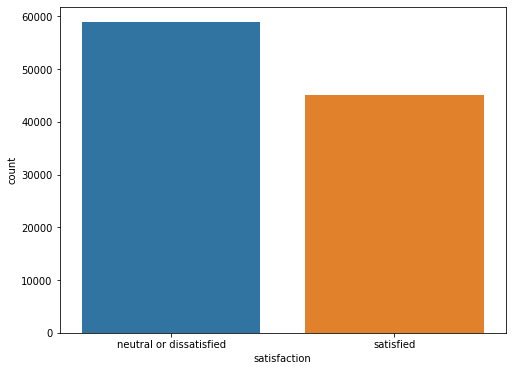

In [8]:
## In this data, the main focus of my analysis is to examine ["satisfaction"] of customer
## I want to make sure this dataset did not fall into any biasness 
## in terms of total number of satisfy customer and not satisfy customer

plt.figure(figsize = (8,6))
sns.countplot(x = "satisfaction", data = df)
plt.show()

In [9]:
df["satisfaction"].value_counts().to_frame()

,satisfaction
neutral or dissatisfied,58879
satisfied,45025


In [10]:
unsatisfy =(df.satisfaction == "neutral or dissatisfied").sum()
satisfy =(df.satisfaction =="satisfied").sum()

p_unsatisfy = (unsatisfy /df.shape[0])
p_satisfy = (satisfy /df.shape[0])

In [11]:
print("Percentage of unsatisfy customer:{:.2f}".format(p_unsatisfy))
print("Percentage of unsatisfy customer:{:.2f}".format(p_satisfy))

Percentage of unsatisfy customer:0.57
Percentage of unsatisfy customer:0.43


In [12]:
## As the distribution of satisfy and unsatisfy customer is not significant large
## This consider a fair data
## Let's replace satisfy and not satisfy to 0 and 1 to make it simple

In [13]:
df["satisfaction"].replace({"neutral or dissatisfied": 0, "satisfied":1}, inplace = True)

In [15]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,Male,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,Male,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,Female,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,Female,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,Male,1


In [16]:
for col in df.columns:
    print(col)

Gender
Customer Type
Age
Type of Travel
Class
Flight Distance
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes
satisfaction


In [18]:
## So I guess the columns value will be 0 to 5 as it is the rating of the particular columns
## Let's see if I am correct, check 3 columns with max and min value here
print("Cleanliness Max:", df["Cleanliness"].max())
print("Cleanliness Min:", df["Cleanliness"].min())

Cleanliness Max: 5
Cleanliness Min: 0


In [22]:
print("Ease of Online booking Max:", df["Ease of Online booking"].max())
print("Ease of Online booking Min:", df["Ease of Online booking"].min())
print("_" * 20)
print("Checkin service Max:", df["Checkin service"].max())
print("Checkin service Min:", df["Checkin service"].min())

Ease of Online booking Max: 5
Ease of Online booking Min: 0
____________________
Checkin service Max: 5
Checkin service Min: 0


In [ ]:
## Okay, now I will do visualization with this 3 columns with seaborn.axes

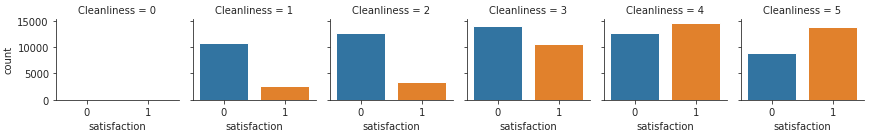

In [33]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=df, kind="count", height=2, aspect=1)

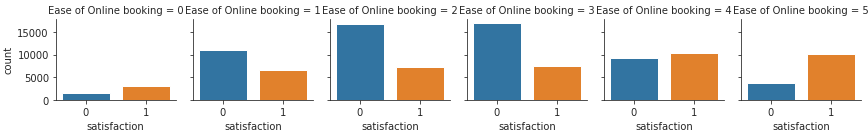

In [38]:
## As you can see, when the Cleanliness increase, the total number of satified customer increase
## Now I do the second columns which is Easo of Online Booking

with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Ease of Online booking", col_wrap=6, data=df, kind="count", height=2, aspect=1)

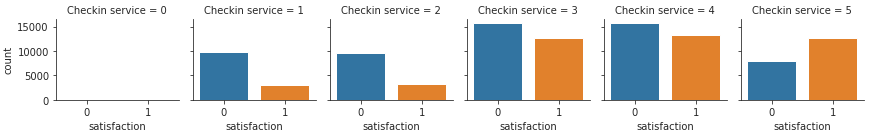

In [39]:
## This increase is not so significant but I can still notice as the Ease of Online booking increase
## the satisfy customer increase too

with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Checkin service", col_wrap=6, data=df, kind="count", height=2, aspect=1)

In [40]:
## This is not significant also, lets do what I can. I will use a multiple linear regression to find their coeff_

In [45]:
## Make this 3 columns into dataset first
df1 = df[["Cleanliness", "Ease of Online booking", "Checkin service", "satisfaction"]]

In [46]:
df1.head()

,Cleanliness,Ease of Online booking,Checkin service,satisfaction
0,5,3,4,0
1,1,3,1,0
2,5,2,4,1
3,2,5,1,0
4,3,3,3,1


In [47]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(df1[["Cleanliness", "Ease of Online booking", "Checkin service"]])
y = np.asanyarray(df1[["satisfaction"]])
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print("Coefficients:", regr.coef_)

Coefficients: [[0.10162423 0.05855005 0.072844  ]]


In [52]:
## Do some calculation for residual sum of square and variance and see if I can improve this model
## which I want to use only 3 variables/ columns

yhat = regr.predict(df[["Cleanliness", "Ease of Online booking", "Checkin service"]])
x = np.asanyarray(df1[["Cleanliness", "Ease of Online booking", "Checkin service"]])
y = np.asanyarray(df1[["satisfaction"]])

In [58]:
print("Residual sum of squares: %.2f" % np.mean((yhat-y) ** 2))

Residual sum of squares: 0.21


In [59]:
print("Variances: %.2f" %regr.score(x, y))

Variances: 0.15


In [69]:
## Let's see if I can reduce Residual sum of squares and variances with another model

regr1 = linear_model.LinearRegression()
df2 = df[["Inflight wifi service", "Seat comfort", "Inflight entertainment", "satisfaction"]]
x1 = np.asanyarray(df2[["Inflight wifi service", "Seat comfort", "Inflight entertainment"]])
y1 = np.asanyarray(df2[["satisfaction"]])
regr1.fit(x1, y1)

print("Coefficients:", regr1.coef_)

Coefficients: [[0.07876374 0.06438713 0.092651  ]]


In [70]:
yhat1 = regr.predict(df[["Inflight wifi service", "Seat comfort", "Inflight entertainment"]])
x1 = np.asanyarray(df2[["Inflight wifi service", "Seat comfort", "Inflight entertainment"]])
y1 = np.asanyarray(df2[["satisfaction"]])
print("Residual sum of squares: %.2f" % np.mean((yhat1-y1) ** 2))

print("Variances: %.2f" %regr1.score(x, y))

Residual sum of squares: 0.19
Variances: 0.15


In [71]:
## This model is more successful than the previous 1 as the residual sum of squares have reduced